# An introduction to matplotlib

Matplotlib is a Python package used widely throughout the scientific Python community to produce high quality 2D publication graphics. It transparently supports a wide range of output formats including PNG (and other raster formats), PostScript/EPS, PDF and SVG and has interfaces for all of the major desktop GUI (Graphical User Interface) toolkits.

Matplotlib comes with a convenience sub-package called ``pyplot``. For consistency with the wider maptlotlib community, this should always be imported as ``plt``:

In [1]:
# Display matplotlib graphics inline in the notebook window.
%matplotlib inline

# Import the Python matplotlib package.
import matplotlib.pyplot as plt

## The matplotlib Figure

At the heart of every matplotlib plot is the "Figure". The Figure is the top level concept that can be drawn to one of the many output formats, or simply just to screen.

Let's create our first Figure using pyplot, and then show it:

In [2]:
fig = plt.figure()
plt.show()

On its own, drawing the Figure is uninteresting and will result in an empty piece of paper (that's why we didn't see anything above).  
Other visible elements are added to a Figure to make a plot.  All visible items in Matplotlib are instances of the [Artist](http://matplotlib.org/api/artist_api.html#artist-class) class :  The Figure and Axes are both types of Artist.

To start with we can draw an [Axes](http://matplotlib.org/api/axes_api.html) artist in the Figure, to represent our data space. The most basic Axes is rectangular and has tick labels and tick marks.  Multiple Axes artists can be placed on a Figure.

Let's go ahead and create a Figure with a single Axes, and show it using pyplot:

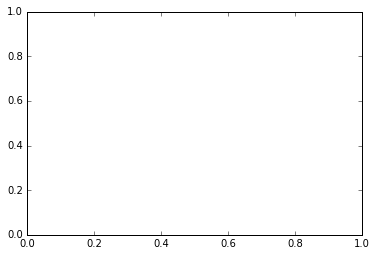

In [3]:
ax = plt.axes()
plt.show()

Matplotlib's ``pyplot`` module makes the process of creating graphics easier by allowing us to skip some of the tedious object construction. For example, we did not need to manually create the Figure with ``plt.figure`` because it was implicit that we needed a Figure when we created the Axes.

Under the hood matplotlib still had to create a Figure; we just didn't need to capture it into a variable. We can access the created object with the "state" functions found in pyplot called **``gcf``** and **``gca``**.

### Exercise 1

Go to matplotlib.org and search for what these strangely named functions do.

Hint: you will find multiple results so remember we are looking for the ``pyplot`` versions of these functions.

## Working with the Axes

As has already been mentioned, most of your time building a graphic in matplotlib will be spent on the Axes. Whilst the matplotlib documentation for the Axes is very detailed, it is also rather difficult to navigate (though this is an area of ongoing improvement).

As a result, it is often easier to find new plot types by looking at the pyplot module's documentation.

The first and most common Axes method is ``plot``. Go ahead and look at the ``plot`` documentation from the following sources:

 * http://matplotlib.org/api/pyplot_summary.html
 * http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
 * http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.plot
 
Plot can be used to draw one or more lines in axes data space:

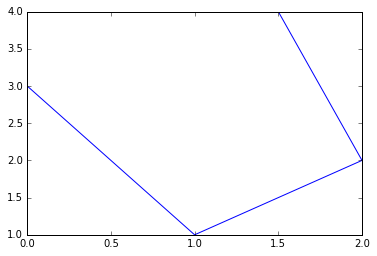

In [4]:
ax = plt.axes()
line1, = ax.plot([0, 1, 2, 1.5], [3, 1, 2, 4])
plt.show()

Notice how the Axes view limits (``ax.viewLim``) have been updated to include the whole of the line.
Should we want to add some spacing around the edges of our Axes we can set a margin using the [``margins``](http://matplotlib.org/api/axes_api.html?highlight=axes#matplotlib.axes.Axes.margins) method. Alternatively, we can manually set the limits with the [``set_xlim``](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.set_xlim) and [``set_ylim``](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.set_ylim) methods.

### Exercise 2

Modify the previous example to produce three different Figures that control the limits of the Axes.

1\. Manually set the x and y limits to $[0.5, 2]$ and $[1, 5]$ respectively.

  2\. Define a margin such that there is 10% whitespace inside the axes around the drawn line (Hint: numbers to margins are normalised such that 0% is 0.0 and 100% is 1.0).

3\. Set a 10% margin on the Axes with the lower y limit set to 0. (Note: order is important here)

--------------

If we want to create a plot in its simplest form, without any modifications to the Figure or Axes, we can leave out the creation of artist variables. Our simple line example then becomes:

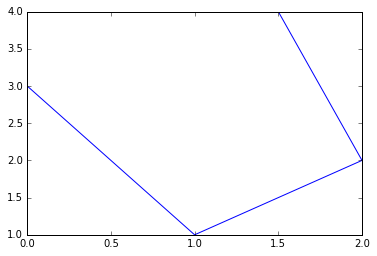

In [5]:
plt.plot([0, 1, 2, 1.5], [3, 1, 2, 4])
plt.show()

The simplicity of this example shows how visualisations can be produced quickly and easily with matplotlib, but it is worth remembering that for full control of the Figure and Axes artists we can mix the convenience of ``pyplot`` with the power of matplotlib's object oriented design.

### Exercise 3

By calling ``plot`` multiple times, create a single Axes showing the line plots of $y=sin(x)$ and $y=cos(x)$ in the interval $[0, 2\pi]$ with 200 linearly spaced $x$ samples.

--------

## Multiple Axes on the same Figure (aka subplot)

Matplotlib makes it relatively easy to add more than one Axes to a Figure. The ``add_subplot`` method on a Figure, which is wrapped by the ``subplot`` function in ``pyplot``, adds a set of Axes in the grid position specified. To compute the position, we must tell matplotlib the number of rows and columns to separate the Figure into, and which number the Axes to be created is (1 based). For example, to create Axes at the top right and bottom left of a $3 x 2$ grid, the grid specifications would be ``2, 3, 3`` and ``2, 3, 4`` respectively:

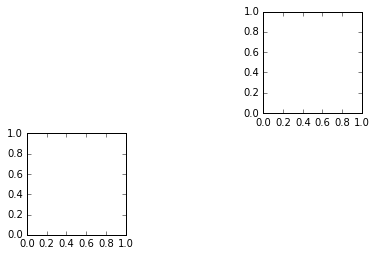

In [6]:
top_right_ax = plt.subplot(2, 3, 3)
bottom_left_ax = plt.subplot(2, 3, 4)

plt.show()

--------

**Exercise 3 continued:** Copy the answer from the previous task (plotting $y=sin(x)$ and $y=cos(x)$) and add the appropriate ``plt.subplot`` calls to create a Figure with two rows of Axes, one showing $y=sin(x)$ and the other showing $y=cos(x)$.

--------

## Further plot types

Matplotlib comes with a huge variety of different plot types. Here is a quick demonstration of the more common ones.

In [7]:
import numpy as np

In [8]:
x = np.linspace(-180, 180, 60)
y = np.linspace(-90, 90, 30)
x2d, y2d = np.meshgrid(x, y)
data = np.cos(3 * np.deg2rad(x2d)) + np.sin(2 * np.deg2rad(y2d))

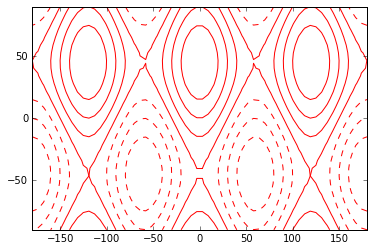

In [9]:
# A contour plot draws continuous lines of constant z value on an x-y plane, where z is a 2D array.
plt.contour(x, y, data, colors='red')
plt.show()

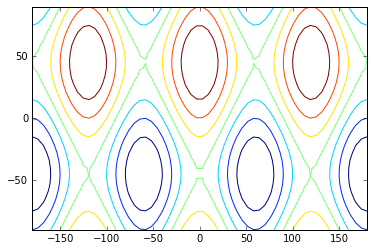

In [10]:
# The line colours default to a colour map determined by the data values.\n",
plt.contour(x, y, data)
plt.show()

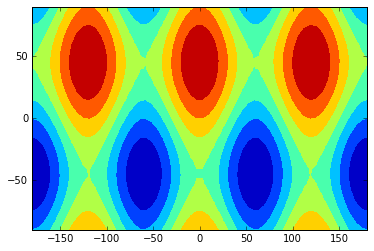

In [11]:
# A contourf is a filled contour plot.
plt.contourf(x, y, data)
plt.show()

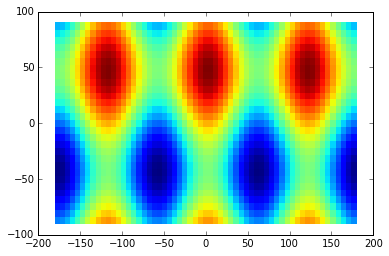

In [12]:
# A pcolormesh is a pseudocolour plot whose cell colours are determined by the values of the input array.
plt.pcolormesh(x, y, data)
plt.show()

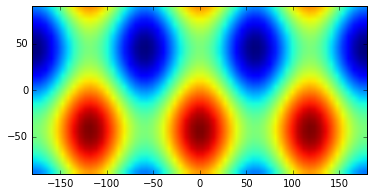

In [13]:
# An imshow displays array elements as the pixels of an image.
# The result is similar to a pcolormesh, but its vertical orientation is reversed
# (i.e. it would appear upside down compared with a pcolor).
# X and Y coordinates are just pixel counts, and the image is smoothly stretched to fill the space.
plt.imshow(data, extent=[-180, 180, -90, 90])
plt.show()

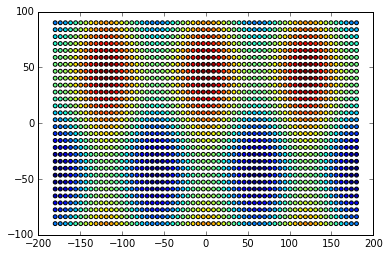

In [14]:
# A scatter plot draws the array elements as point markers on an x-y plane, coloured by the data values.
plt.scatter(x2d, y2d, c=data, s=15)
plt.show()

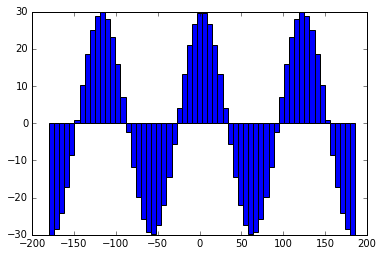

In [15]:
# A bar chart displays bars of constant width and heights representing the values of the input array.
plt.bar(x, data.sum(axis=0), width=np.diff(x)[0])
plt.show()

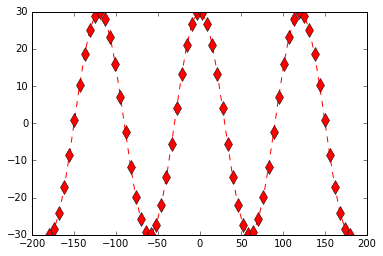

In [16]:
# A plot is a line plot with options to add markers to the line.
plt.plot(x, data.sum(axis=0), linestyle='--',
         marker='d', markersize=10, color='red')
plt.show()

## Titles, legends, colorbars and annotations

Matplotlib has convenience functions for the addition of plot elements such as titles, legends, colorbars and text based annotation.

The ``suptitle`` pyplot function allows us to set the title of a Figure, and the ``set_title`` method on an Axes allows us to set the title of an individual Axes. Additionally, an Axes has methods named ``set_xlabel`` and ``set_ylabel`` to label the respective x and y axes. Finally, we can add text, located by data coordinates, with the Axes ``text`` method:

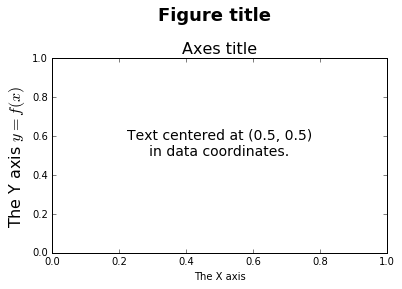

In [17]:
fig = plt.figure()
ax = plt.axes()
# Adjust the created axes so its topmost extent is 0.8 of the figure.
fig.subplots_adjust(top=0.8)

fig.suptitle('Figure title', fontsize=18, fontweight='bold')
ax.set_title('Axes title', fontsize=16)

ax.set_xlabel('The X axis')
ax.set_ylabel('The Y axis $y=f(x)$', fontsize=16)

ax.text(0.5, 0.5, 'Text centered at (0.5, 0.5)\nin data coordinates.',
        horizontalalignment='center', fontsize=14)

plt.show()

The creation of a legend is as simple as adding a "label" to lines of interest. This can be done in the call to ``plt.plot`` and then followed up with a call to ``plt.legend``:

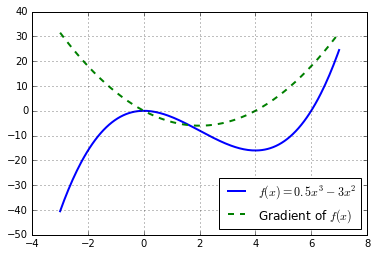

In [18]:
x = np.linspace(-3, 7, 200)
plt.plot(x, 0.5*x**3 - 3*x**2, linewidth=2,
         label='$f(x)=0.5x^3-3x^2$')
plt.plot(x, 1.5*x**2 - 6*x, linewidth=2, linestyle='--',
         label='Gradient of $f(x)$', )
plt.legend(loc='lower right')
plt.grid()
plt.show()

Colorbars are created with the ``plt.colorbar`` function:

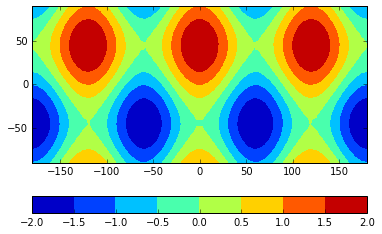

In [19]:
x = np.linspace(-180, 180, 60)
y = np.linspace(-90, 90, 30)
x2d, y2d = np.meshgrid(x, y)
data = np.cos(3 * np.deg2rad(x2d)) + np.sin(2 * np.deg2rad(y2d))

plt.contourf(x, y, data)
plt.colorbar(orientation='horizontal')
plt.show()

Matplotlib comes with powerful annotation capabilities, which  are described in detail at http://matplotlib.org/users/annotations_intro.html.

The annotation's power can mean that the syntax is a little harder to read, which is demonstrated by one of the simplest examples of using annotate:

/opt/scitools/environments/experimental/2017_01_24/lib/python2.7/site-packages/matplotlib/text.py:2242: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  "'frac' option in 'arrowprops' is no longer supported;"


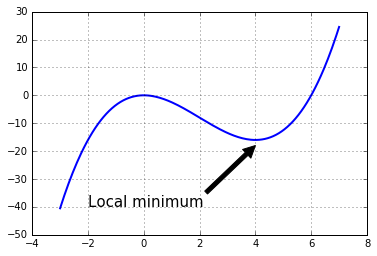

In [20]:
x = np.linspace(-3, 7, 200)
plt.plot(x, 0.5*x**3 - 3*x**2, linewidth=2)
plt.annotate('Local minimum',
             xy=(4, -18),
             xytext=(-2, -40), fontsize=15,
             arrowprops={'facecolor': 'black', 'frac': 0.3})
plt.grid()
plt.show()

## Savefig & backends

Matplotlib allows you to specify a "backend" to drive rendering the Figure. The backend includes the graphical user interface (GUI) library to use, and the most used backend (as it is normally the default one) is the "TkAgg" backend. When ``plt.show()`` is called, this backend pops up a Figure in a new TkInter window, which is rendered by the anti-grain graphics library (also known as "agg"). Generally, the most common reason to want to change backends is for automated Figure production on a headless server. In this situation, the "agg" backend can be used:

    import matplotlib
    matplotlib.use('agg')
    import matplotlib.pyplot as plt
    
Note: The backend must be chosen before importing pyplot for the first time, unless the ``force`` keyword is added.

Non-interactive backends such as the "agg" backend will do nothing when **``plt.show()``** is called - this is because there is nowhere (no graphical display) specified for a Figure to be displayed.

To save a Figure programmatically the ``savefig`` function can be used from _any_ backend:

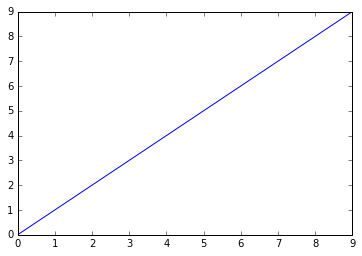

In [21]:
plt.plot(range(10))
plt.savefig('simple.svg')

For graphical backends, showing and subsequently closing the window of a Figure results in the Figure being cleared from the matplotlib system. This is not the case for ``plt.savefig``, which typically should be called before ``plt.show``.

It is also possible to manually close Figures without showing them by using the ``plt.close`` function. This could be called to remove the current Figure after saving it with ``plt.savefig`` on the occasion where not clearing the Figure might interfere with subsequent plots to be created.